In [1]:
!pip install bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import random 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=20090397f8bbb89116031ae79ca1140e7752914877fbf3abc3b220cc7a630628
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


## Parsing and cleaning the data

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re


url = urlopen("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(url, 'html.parser')
table_data = soup.find("table").findAll("td")
parsed_data = []
for data in table_data:
    new_data = []
    postal_code = data.find("b").text
    borough_data = data.find("span")
    if postal_code and borough_data.text != "Not assigned":
        borough_data_vals = re.split('[(]',borough_data.text)
        borough = borough_data_vals[0]
        neighborhoods = borough_data_vals[1].replace(" / ", ",").replace(")", "")
        new_data.append(postal_code)
        new_data.append(borough)
        new_data.append(neighborhoods)
        parsed_data.append(new_data)


In [3]:
df1 = pd.DataFrame(parsed_data, columns = ["Postal_code", "Borough", "Neighborhood"])
df1.head()

,Postal_code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park,Harbourfront"
3,M6A,North York,"Lawrence Manor,Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [4]:
df2 = df1[df1.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df3 = df2.groupby(['Postal_code','Borough'], sort=False).agg(', '.join)
df3.reset_index(inplace=True)


In [5]:
df3

,Postal_code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park,Harbourfront"
3,M6A,North York,"Lawrence Manor,Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway,Montgomery Road,Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South,King's Mill Park,Sunnylea,Humbe..."


In [6]:
# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df3['Neighborhood'] = np.where(df3['Neighborhood'] == 'Not assigned',df3['Borough'], df3['Neighborhood'])
df3

,Postal_code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park,Harbourfront"
3,M6A,North York,"Lawrence Manor,Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway,Montgomery Road,Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South,King's Mill Park,Sunnylea,Humbe..."


In [7]:
df3['Borough'] = df3['Borough'].str.replace('EtobicokeNorthwest','Etobicoke')
df3.Borough[df3.Postal_code=='M7Y'] = 'East Toronto'
df3.Borough[df3.Postal_code=='M5W'] = 'Downtown Toronto'
df3.Borough[df3.Postal_code=='M4J'] = 'East York'

In [8]:
df3

,Postal_code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park,Harbourfront"
3,M6A,North York,"Lawrence Manor,Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway,Montgomery Road,Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South,King's Mill Park,Sunnylea,Humbe..."


In [9]:
df3.shape

(103, 3)

In [10]:
df3.head(60)

,Postal_code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park,Harbourfront"
3,M6A,North York,"Lawrence Manor,Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern,Rouge"
7,M3B,North York,Don MillsNorth
8,M4B,East York,"Parkview Hill,Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


## Creating the dataframe with latitude and longitutde coordinates of each neighborhood

In [11]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
lat_lon.rename(columns={'Postal Code':'Postal_code'},inplace=True)
df4 = pd.merge(df3,lat_lon,on='Postal_code')
df4.head(60)

,Postal_code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park,Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor,Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
7,M3B,North York,Don MillsNorth,43.745906,-79.352188
8,M4B,East York,"Parkview Hill,Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


## Working with only boroughs that contain the word Toronto 

In [13]:
df5 = df4[df4['Borough'].str.contains('Toronto')]
df5 = df5.reset_index(drop=True)
df5

,Postal_code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park,Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond,Adelaide,King",43.650571,-79.384568
8,M6H,West Toronto,"Dufferin,Dovercourt Village",43.669005,-79.442259
9,M5J,Downtown Toronto,"Harbourfront East,Union Station,Toronto Islands",43.640816,-79.381752


## Defining Foursquare API credentials

In [14]:
CLIENT_ID = 'XSKPXKI4EYZVC5ZBYLSIKOU0Y5CQSI1JRBSYPTI2EQAP3N4X' # your Foursquare ID
CLIENT_SECRET = 'CFZM5KMTKEY2YPL1DBW0G25U0FD35NV5KIMBFWZFOJPBXOLI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XSKPXKI4EYZVC5ZBYLSIKOU0Y5CQSI1JRBSYPTI2EQAP3N4X
CLIENT_SECRET:CFZM5KMTKEY2YPL1DBW0G25U0FD35NV5KIMBFWZFOJPBXOLI


## Getting the venue of all the neighborhoods in Toronto

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
toronto_venues = getNearbyVenues(names=df5['Neighborhood'],
                                   latitudes=df5['Latitude'],
                                   longitudes=df5['Longitude']
                                  )

Regent Park,Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond,Adelaide,King
Dufferin,Dovercourt Village
Harbourfront East,Union Station,Toronto Islands
Little Portugal,Trinity
The Danforth West,Riverdale
Toronto Dominion Centre,Design Exchange
Brockton,Parkdale Village,Exhibition Place
India Bazaar,The Beaches West
Commerce Court,Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park,The Junction South
North Toronto West
The Annex,North Midtown,Yorkville
Parkdale,Roncesvalles
Davisville
University of Toronto,Harbord
Runnymede,Swansea
Moore Park,Summerhill East
Kensington Market,Chinatown,Grange Park
Summerhill West,Rathnelly,South Hill,Forest Hill SE,Deer Park
CN Tower,King and Spadina,Railway Lands,Harbourfront West,Bathurst Quay,South Niagara,Island airport
Rosedale
Enclave of M5E
St. James Town,Cabbagetown
First Canadian Place,Underground city
Church and Wellesley
Encla

In [17]:
print(toronto_venues.shape)
toronto_venues.head(30)

(1568, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park,Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park,Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park,Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park,Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park,Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
5,"Regent Park,Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
6,"Regent Park,Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
7,"Regent Park,Harbourfront",43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
8,"Regent Park,Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
9,"Regent Park,Harbourfront",43.65426,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market


## Extracting and grouping all the venues on venue category 

In [18]:
#print('There are {} uniques categories.'.format(len(tr['Venue Category'].unique())))

In [19]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot

,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(toronto_grouped.shape)
toronto_grouped

(38, 235)


,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton,Parkdale Village,Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"CN Tower,King and Spadina,Railway Lands,Harbou...",0.000000,0.000000,0.066667,0.066667,0.066667,0.133333,0.2,0.066667,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Central Bay Street,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.016129,0.000000,0.000000,0.016129,0.000000,0.000000
4,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.025316,0.012658,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.012658,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.012658,0.000000
6,"Commerce Court,Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.030000,...,0.00000,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
7,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.027778,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Dufferin,Dovercourt Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
chinese = toronto_grouped[['Neighborhood','Chinese Restaurant']].copy()
chinese.head()

,Neighborhood,Chinese Restaurant
0,Berczy Park,0.0
1,"Brockton,Parkdale Village,Exhibition Place",0.0
2,"CN Tower,King and Spadina,Railway Lands,Harbou...",0.0
3,Central Bay Street,0.0
4,Christie,0.0


In [22]:
chinese.shape

(38, 2)

In [23]:
df_merge = pd.merge(df5, chinese, on='Neighborhood')
df_merge

,Postal_code,Borough,Neighborhood,Latitude,Longitude,Chinese Restaurant
0,M5A,Downtown Toronto,"Regent Park,Harbourfront",43.654260,-79.360636,0.000000
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.010000
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.000000
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.000000
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.000000
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.000000
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.000000
7,M5H,Downtown Toronto,"Richmond,Adelaide,King",43.650571,-79.384568,0.000000
8,M6H,West Toronto,"Dufferin,Dovercourt Village",43.669005,-79.442259,0.000000
9,M5J,Downtown Toronto,"Harbourfront East,Union Station,Toronto Islands",43.640816,-79.381752,0.010000


## Visualization

In [24]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
!pip install folium
import folium 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 4.1 MB/s  eta 0:00:01


In [25]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,neighbourhood in zip(df_merge['Latitude'],df_merge['Longitude'],df_merge['Neighborhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

Print the top 5 venues for each neighborhood:

In [26]:
from sklearn.cluster import KMeans
kclusters = 5

toronto_grouped_clustering = df_merge.drop(['Borough','Postal_code','Neighborhood'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 4, 2, 4, 4, 1, 4, 3, 4], dtype=int32)

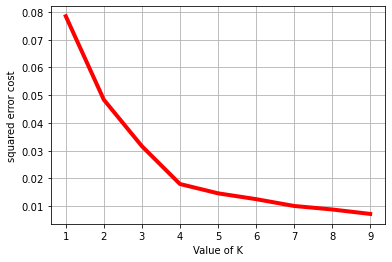

In [27]:
cost = []
for i in range(1,10):
    k = KMeans(n_clusters =i, max_iter=500)
    k.fit(toronto_grouped_clustering)
    cost.append(k.inertia_)
plt.plot(range(1,10),cost,color='r',linewidth='4')
plt.xlabel("Value of K")
plt.ylabel("squared error cost")
plt.grid()
plt.show()
    

### The above graph shows that the best value of K is 4

## Visualizing the clusters

In [28]:
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [29]:
df_merge.insert(0, 'Cluster Labels', kmeans.labels_)

In [30]:
df_merge

,Cluster Labels,Postal_code,Borough,Neighborhood,Latitude,Longitude,Chinese Restaurant
0,4,M5A,Downtown Toronto,"Regent Park,Harbourfront",43.654260,-79.360636,0.000000
1,4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.010000
2,4,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.000000
3,2,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.000000
4,4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.000000
5,4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.000000
6,1,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.000000
7,4,M5H,Downtown Toronto,"Richmond,Adelaide,King",43.650571,-79.384568,0.000000
8,3,M6H,West Toronto,"Dufferin,Dovercourt Village",43.669005,-79.442259,0.000000
9,4,M5J,Downtown Toronto,"Harbourfront East,Union Station,Toronto Islands",43.640816,-79.381752,0.010000


In [39]:
map_clusters = folium.Map(location=[43.651070,-79.347015], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Neighborhood'], df_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat,lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining clusters

In [32]:
df_merge.loc[df_merge['Cluster Labels'] == 0]

,Cluster Labels,Postal_code,Borough,Neighborhood,Latitude,Longitude,Chinese Restaurant
17,0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.00
18,0,M5N,Central Toronto,Roselawn,43.711695,-79.416936,0.00
19,0,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0.00
20,0,M5P,Central Toronto,Forest Hill North & West,43.696948,-79.411307,0.00
22,0,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,0.05
25,0,M4S,Central Toronto,Davisville,43.704324,-79.388790,0.00
28,0,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160,0.00
30,0,M4V,Central Toronto,"Summerhill West,Rathnelly,South Hill,Forest Hi...",43.686412,-79.400049,0.00


In [33]:
df_merge.loc[df_merge['Cluster Labels'] == 1]

,Cluster Labels,Postal_code,Borough,Neighborhood,Latitude,Longitude,Chinese Restaurant
6,1,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.0
10,1,M6J,West Toronto,"Little Portugal,Trinity",43.647927,-79.419750,0.0
13,1,M6K,West Toronto,"Brockton,Parkdale Village,Exhibition Place",43.636847,-79.428191,0.0
23,1,M5R,Central Toronto,"The Annex,North Midtown,Yorkville",43.672710,-79.405678,0.0
26,1,M5S,Downtown Toronto,"University of Toronto,Harbord",43.662696,-79.400049,0.0
29,1,M5T,Downtown Toronto,"Kensington Market,Chinatown,Grange Park",43.653206,-79.400049,0.0
31,1,M5V,Downtown Toronto,"CN Tower,King and Spadina,Railway Lands,Harbou...",43.628947,-79.394420,0.0


In [34]:
df_merge.loc[df_merge['Cluster Labels'] == 2]

,Cluster Labels,Postal_code,Borough,Neighborhood,Latitude,Longitude,Chinese Restaurant
3,2,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.0
11,2,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,0.0
14,2,M4L,East Toronto,"India Bazaar,The Beaches West",43.668999,-79.315572,0.0
16,2,M4M,East Toronto,Studio District,43.659526,-79.340923,0.0
37,2,M7Y,East Toronto,Enclave of M4L,43.662744,-79.321558,0.0


In [35]:
df_merge.loc[df_merge['Cluster Labels'] == 3]

,Cluster Labels,Postal_code,Borough,Neighborhood,Latitude,Longitude,Chinese Restaurant
8,3,M6H,West Toronto,"Dufferin,Dovercourt Village",43.669005,-79.442259,0.0
21,3,M6P,West Toronto,"High Park,The Junction South",43.661608,-79.464763,0.0
24,3,M6R,West Toronto,"Parkdale,Roncesvalles",43.648960,-79.456325,0.0
27,3,M6S,West Toronto,"Runnymede,Swansea",43.651571,-79.484450,0.0


In [36]:
df_merge.loc[df_merge['Cluster Labels'] == 4]

,Cluster Labels,Postal_code,Borough,Neighborhood,Latitude,Longitude,Chinese Restaurant
0,4,M5A,Downtown Toronto,"Regent Park,Harbourfront",43.654260,-79.360636,0.000000
1,4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.010000
2,4,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.000000
4,4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.000000
5,4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.000000
7,4,M5H,Downtown Toronto,"Richmond,Adelaide,King",43.650571,-79.384568,0.000000
9,4,M5J,Downtown Toronto,"Harbourfront East,Union Station,Toronto Islands",43.640816,-79.381752,0.010000
12,4,M5K,Downtown Toronto,"Toronto Dominion Centre,Design Exchange",43.647177,-79.381576,0.010000
15,4,M5L,Downtown Toronto,"Commerce Court,Victoria Hotel",43.648198,-79.379817,0.000000
32,4,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0.000000


## Visualize the maximum number of Chinese restaurants

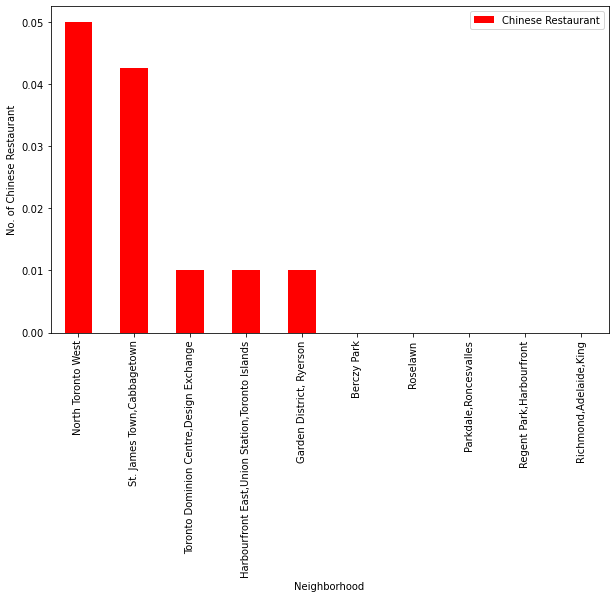

In [37]:
graph = pd.DataFrame(df_merge.groupby('Neighborhood')['Chinese Restaurant'].sum())
graph = graph.sort_values(by='Chinese Restaurant',ascending=False)
graph.iloc[:10].plot(kind='bar',figsize=(10,6),color='red')
plt.ylabel('No. of Chinese Restaurant')
plt.xlabel('Neighborhood')
plt.show()


## Insights

From above exploratory data analysis and clustering, following conclusion can be made: <br>
1. North Toronto West has the highest number of chinese restaurants, it could be due to people having the taste of chinese food or more chinese people live in that area. <br>
2. Cluster 4 has the most number of chinese restaurants in area, which could be due to high demand.<br> 
3. Clusters 1,2,3 have less chinese restaurants which means that it is the least popular food around. <br>
4. Toronto Dominion,Harbourfront, Garden District have less but same number of chinese restaurants around. <br>


## Conclusion

I would conclude here by saying that it would be best to open the chinese restaurant in Downtown Toronto M5J (Harbourfront East, Union Station, Toronto Island) as more
people would be visting this area and also because there would be less competition, which would increase the chances of making it successful.